<a href="https://colab.research.google.com/github/johnkevinoregan/Learning-Relations-with-Deep-Learning/blob/main/Bright_dark_comparison_task_DONT_CHANGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brightness comparison on 1D retina: generalization untrained brightnesses
15 Mar 2023 -- work in prog

---

This program is not yet finished. 

The idea: There are two pixels lit up on the Left and Right of the retina. The NN is to respond 1 when the left one is brighter than the Right one. I train on a collection of Brightnesses with equal numbers of 0 and 1 responses. I then test on these plus the same combinations at retinal positions more widely separated by distance DeltaPos in range(Deltas) from the training locations.  

problems: 

the test set contains the case when the two brightnesses are equal. I should get rid of that.

In plotting the results: at the moment I've just plotted the prediction for different values of brightness of the left-hand pixel. But I should do this separately for different retinal positions, and for different values of the correct answer (ie whether it was brighter or dimmer than the right-hand pixel). 

There's something funny about the results in the normal NN case!!??

In [74]:
import numpy as np
RetSize=18
Left=int(RetSize/4)
Right=3*Left
TrainRepeats=3
Deltas=3 #number of deviations from base retinal positions used in test

W=3 #half the number of brightnesses in the test set
W2=2*W

Brightnesses=np.arange(-W2,W2+1)*16+125-8
#print(Brightnesses)
LBrightnesses=len(Brightnesses)
#print('length',L)
X_test=np.zeros((LBrightnesses*(1+Deltas),RetSize),int)
y_test=np.zeros(LBrightnesses*(1+Deltas),int)
res_test=np.zeros(LBrightnesses*(1+Deltas),float)

X_train=np.zeros((2*TrainRepeats,RetSize),int)
y_train=np.zeros(2*TrainRepeats,int)
#print(X_train)

#there's a problem in this loop since it 
trial=0
for DeltaPos in range(Deltas+1):
  for trial in range(LBrightnesses):
    T=trial+DeltaPos*LBrightnesses
    #print(T,Left-DeltaPos)
    X_test[T,Left-DeltaPos]=Brightnesses[trial]
    k=LBrightnesses-trial-1
    X_test[T,Right+DeltaPos]=Brightnesses[k]
    if X_test[T,Left-DeltaPos]<X_test[T,Right+DeltaPos]:
      y_test[T]=1
print('test stimuli')
print(X_test)
print('test labels')
print(y_test)

trial=0
while trial <= TrainRepeats+1:
  X_train[trial,Left]=Brightnesses[W]
  X_train[trial,Right]=Brightnesses[LBrightnesses-W-1]
  if X_train[trial,Left]<X_train[trial,Right]:
    y_train[trial]=1
  trial += 1
  X_train[trial,Left]=Brightnesses[LBrightnesses-W-1]
  X_train[trial,Right]=Brightnesses[W]
  if X_train[trial,Left]<X_train[trial,Right]:
    y_train[trial]=1
  trial +=1

print('training stimuli')
print(X_train)
print('training labels')
print(y_train)


test stimuli
[[  0   0   0   0  21   0   0   0   0   0   0   0 213   0   0   0   0   0]
 [  0   0   0   0  37   0   0   0   0   0   0   0 197   0   0   0   0   0]
 [  0   0   0   0  53   0   0   0   0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0  69   0   0   0   0   0   0   0 165   0   0   0   0   0]
 [  0   0   0   0  85   0   0   0   0   0   0   0 149   0   0   0   0   0]
 [  0   0   0   0 101   0   0   0   0   0   0   0 133   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0 133   0   0   0   0   0   0   0 101   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0   0   0  85   0   0   0   0   0]
 [  0   0   0   0 165   0   0   0   0   0   0   0  69   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0   0   0  53   0   0   0   0   0]
 [  0   0   0   0 197   0   0   0   0   0   0   0  37   0   0   0   0   0]
 [  0   0   0   0 213   0   0   0   0   0   0   0  21   0   0   0   0   0]
 [  0   0   

##Make training sets X_train and labels y_train

## Train with normal NN

In [75]:
# Build, compile and train the neural network model
#there are two hidden layers with 64 and 32 values
#The ReLU activation function is used in deep learning models to introduce non-linearity into the network
#the sigmoid activation function produces a probability value between 0 and 1
from tensorflow import keras
import numpy as np
#from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
#from sklearn.model_selection import train_test_split
#from tensorflow.keras.callbacks import EarlyStopping


model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_dim=len(X_train[0])),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train, epochs=6, batch_size=32)




Epoch 1/6
1/1 [==============================] - 1s 773ms/step - loss: 2.7365 - accuracy: 0.0000e+00
Epoch 2/6
1/1 [==============================] - 0s 13ms/step - loss: 1.5709 - accuracy: 0.0000e+00
Epoch 3/6
1/1 [==============================] - 0s 11ms/step - loss: 0.7144 - accuracy: 0.5000
Epoch 4/6
1/1 [==============================] - 0s 11ms/step - loss: 0.2559 - accuracy: 1.0000
Epoch 5/6
1/1 [==============================] - 0s 12ms/step - loss: 0.0912 - accuracy: 1.0000
Epoch 6/6
1/1 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 1.0000


In [76]:

for trial in range(len(X_test)):
  pred=model.predict(np.array([X_test[trial]]), verbose=0)
  res_test[trial]=pred[0][0]
  #print(np.around(pred[0][0],1),y_test[trial],X_test[trial])
  print(np.around(res_test[trial],1),y_test[trial],X_test[trial])

print(res_test)


0.9 1 [  0   0   0   0  21   0   0   0   0   0   0   0 213   0   0   0   0   0]
0.9 1 [  0   0   0   0  37   0   0   0   0   0   0   0 197   0   0   0   0   0]
1.0 1 [  0   0   0   0  53   0   0   0   0   0   0   0 181   0   0   0   0   0]
1.0 1 [  0   0   0   0  69   0   0   0   0   0   0   0 165   0   0   0   0   0]
1.0 1 [  0   0   0   0  85   0   0   0   0   0   0   0 149   0   0   0   0   0]
0.8 1 [  0   0   0   0 101   0   0   0   0   0   0   0 133   0   0   0   0   0]
0.3 0 [  0   0   0   0 117   0   0   0   0   0   0   0 117   0   0   0   0   0]
0.0 0 [  0   0   0   0 133   0   0   0   0   0   0   0 101   0   0   0   0   0]
0.0 0 [  0   0   0   0 149   0   0   0   0   0   0   0  85   0   0   0   0   0]
0.0 0 [  0   0   0   0 165   0   0   0   0   0   0   0  69   0   0   0   0   0]
0.1 0 [  0   0   0   0 181   0   0   0   0   0   0   0  53   0   0   0   0   0]
0.2 0 [  0   0   0   0 197   0   0   0   0   0   0   0  37   0   0   0   0   0]
0.5 0 [  0   0   0   0 213   0   0   0  

[ 21  37  53  69  85 101 117 133 149 165 181 197 213  21  37  53  69  85
 101 117 133 149 165 181 197 213  21  37  53  69  85 101 117 133 149 165
 181 197 213  21  37  53  69  85 101 117 133 149 165 181 197 213]
[0.86 0.95 0.97 0.98 0.97 0.8  0.27 0.04 0.02 0.02 0.07 0.24 0.5  0.08
 0.03 0.01 0.   0.01 0.02 0.08 0.61 0.76 0.71 0.74 0.93 1.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]


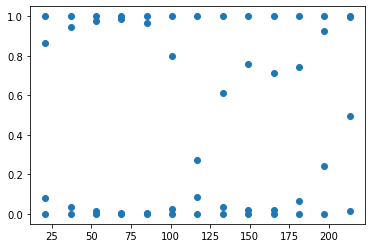

In [77]:
#Plot the prediction for each Brightness level
#NB I should really separate them depending on whether the correct answer is 0 or 1, but I havent done it.
#Also I should separate out according to retinal position..
import matplotlib.pyplot as plt
x_vals=np.zeros(len(X_test),int)
for trial in range(len(X_test)):
  x=np.where(X_test[trial]>0)[0][0]
  x_vals[trial]=X_test[trial][x]
print(x_vals)
print(np.around(res_test,2))
plt.scatter(x_vals,res_test)

Comment on results:
This is quite surprising. I was expecting the NN would not succeed in generalizing to non-trained brightnesses or \retinal positions. In fact it does it pretty well. The trained brightnesses are 69 and 165. There's something I dont understand here.

## Train with CNN

In [82]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(len(X_train[0]), 1)))
model.add(MaxPooling1D(pool_size=4))
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

#loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
#print("Accuracy:", accuracy)

Epoch 1/40
1/1 [==============================] - 1s 809ms/step - loss: 8.8570 - accuracy: 0.0000e+00
Epoch 2/40
1/1 [==============================] - 0s 10ms/step - loss: 5.6070 - accuracy: 0.0000e+00
Epoch 3/40
1/1 [==============================] - 0s 11ms/step - loss: 2.8526 - accuracy: 0.0000e+00
Epoch 4/40
1/1 [==============================] - 0s 12ms/step - loss: 1.3750 - accuracy: 0.5000
Epoch 5/40
1/1 [==============================] - 0s 10ms/step - loss: 0.3002 - accuracy: 1.0000
Epoch 6/40
1/1 [==============================] - 0s 9ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 7/40
1/1 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/40
1/1 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/40
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/40
1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/40
1/1 [=

In [83]:

for trial in range(len(X_test)):
  pred=model.predict(np.array([X_test[trial]]), verbose=0)
  res_test[trial]=pred[0][0]
  #print(np.around(pred[0][0],1),y_test[trial],X_test[trial])
  print(np.around(res_test[trial],1),y_test[trial],X_test[trial])

print(res_test)


1.0 1 [  0   0   0   0  21   0   0   0   0   0   0   0 213   0   0   0   0   0]
1.0 1 [  0   0   0   0  37   0   0   0   0   0   0   0 197   0   0   0   0   0]
1.0 1 [  0   0   0   0  53   0   0   0   0   0   0   0 181   0   0   0   0   0]
1.0 1 [  0   0   0   0  69   0   0   0   0   0   0   0 165   0   0   0   0   0]
1.0 1 [  0   0   0   0  85   0   0   0   0   0   0   0 149   0   0   0   0   0]
1.0 1 [  0   0   0   0 101   0   0   0   0   0   0   0 133   0   0   0   0   0]
1.0 0 [  0   0   0   0 117   0   0   0   0   0   0   0 117   0   0   0   0   0]
0.4 0 [  0   0   0   0 133   0   0   0   0   0   0   0 101   0   0   0   0   0]
0.0 0 [  0   0   0   0 149   0   0   0   0   0   0   0  85   0   0   0   0   0]
0.0 0 [  0   0   0   0 165   0   0   0   0   0   0   0  69   0   0   0   0   0]
0.0 0 [  0   0   0   0 181   0   0   0   0   0   0   0  53   0   0   0   0   0]
0.0 0 [  0   0   0   0 197   0   0   0   0   0   0   0  37   0   0   0   0   0]
0.0 0 [  0   0   0   0 213   0   0   0  

[ 21  37  53  69  85 101 117 133 149 165 181 197 213  21  37  53  69  85
 101 117 133 149 165 181 197 213  21  37  53  69  85 101 117 133 149 165
 181 197 213  21  37  53  69  85 101 117 133 149 165 181 197 213]
[1.   1.   1.   1.   1.   1.   1.   0.44 0.   0.   0.   0.   0.   1.
 1.   1.   1.   1.   1.   1.   0.97 0.55 0.04 0.   0.   0.   1.   1.
 1.   1.   1.   1.   1.   1.   0.98 0.86 0.58 0.27 0.12 0.41 0.33 0.27
 0.21 0.16 0.12 0.09 0.07 0.05 0.04 0.03 0.02 0.02]


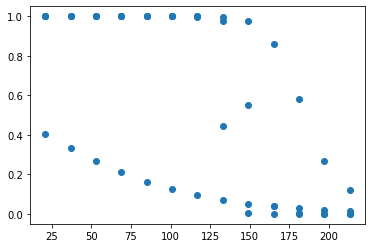

In [84]:
#Plot the prediction for each Brightness level
#NB I should really separate them depending on whether the correct answer is 0 or 1, but I havent done it.
#Also I should separate out according to retinal position..
import matplotlib.pyplot as plt
x_vals=np.zeros(len(X_test),int)
for trial in range(len(X_test)):
  x=np.where(X_test[trial]>0)[0][0]
  x_vals[trial]=X_test[trial][x]
print(x_vals)
print(np.around(res_test,2))
plt.scatter(x_vals,res_test)

###Test CNN 


Comment on results:
Very odd that the CNN does worse than the NN, with results for the higher brightnesses completely wrong.